In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datacon-22/Processed_data/bookings.csv
/kaggle/input/datacon-22/Processed_data/hotels_data.csv
/kaggle/input/datacon-22/Processed_data/bookings_data.csv
/kaggle/input/datacon-22/Processed_data/train_data.csv
/kaggle/input/datacon-22/Processed_data/customer_data.csv
/kaggle/input/datacon-22/Processed_data/sample_submission_5.csv
/kaggle/input/datacon-22/Processed_data/payments_data.csv
/kaggle/input/26-11-filtering-columns/__results__.html
/kaggle/input/26-11-filtering-columns/__notebook__.ipynb
/kaggle/input/26-11-filtering-columns/full_data_filtered.csv
/kaggle/input/26-11-filtering-columns/__output__.json
/kaggle/input/26-11-filtering-columns/custom.css


In [2]:
df = pd.read_csv('/kaggle/input/26-11-filtering-columns/full_data_filtered.csv')
df.head(2)

,booking_id,rating_score,set,booking_status,booking_create_timestamp,booking_approved_at,booking_checkin_customer_date,country,payment_type_mode,payment_type_count,...,agent_fees_sum,hotel_category_max,hotel_category_count,hotel_name_length_mean,hotel_description_length_mean,hotel_photos_qty_mean,booking_expiry_date_min,booking_expiry_date_max,booking_expiry_date_count,seller_agent_id_count
0,87114b39712e6da79b0a377eb73fc7af,4,training,5,2008-01-14 15:13:49.000000000,2008-01-14 15:30:59.000000000,2008-01-20 18:25:41.000000000,5,6.0,1.0,...,27.26,69.0,2.0,42.0,858.0,1.0,2018-01-18 15:47:59.000000000,2018-01-18 15:47:59.000000000,1970-01-01 00:00:00.000000002,2.0
1,81e283fa7e4f11123a3fb894f18e6bfb,5,training,5,2008-02-13 10:42:03.000000000,2008-02-13 15:31:21.000000000,2008-03-02 16:16:35.000000000,0,6.0,1.0,...,134.25,69.0,1.0,48.0,562.0,5.0,2018-02-15 15:48:21.000000000,2018-02-15 15:48:21.000000000,1970-01-01 00:00:00.000000001,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99079 entries, 0 to 99078
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   booking_id                     99079 non-null  object 
 1   rating_score                   99079 non-null  int64  
 2   set                            99079 non-null  object 
 3   booking_status                 99079 non-null  int64  
 4   booking_create_timestamp       99079 non-null  object 
 5   booking_approved_at            98924 non-null  object 
 6   booking_checkin_customer_date  96221 non-null  object 
 7   country                        99079 non-null  int64  
 8   payment_type_mode              99079 non-null  float64
 9   payment_type_count             99078 non-null  float64
 10  payment_sequential_sum         99078 non-null  float64
 11  payment_installments_count     99078 non-null  float64
 12  payment_installments_sum       99078 non-null 

# **Continuos columns have outliers in train and test both - kaise handle karte dekhna hai**

# **Abhi to time wale dekhte hai**

In [4]:
df['booking_create_timestamp'] = pd.to_datetime(df['booking_create_timestamp'])
df['booking_approved_at'] = pd.to_datetime(df['booking_approved_at'])
df['booking_checkin_customer_date'] = pd.to_datetime(df['booking_checkin_customer_date'])
df['booking_expiry_date_min'] = pd.to_datetime(df['booking_expiry_date_min'])
df['booking_expiry_date_max'] = pd.to_datetime(df['booking_expiry_date_max'])
df['booking_expiry_date_count'] = pd.to_datetime(df['booking_expiry_date_count'])

**booking_create_timestamp**

In [5]:
import matplotlib.pyplot as plt

In [6]:
# fig, axs = plt.subplots(2, 3, figsize = (20,10))

# df.groupby(df["booking_create_timestamp"].dt.year)['booking_id'].count().plot(kind="bar", ax = axs[0,0], title = 'year')
# df.groupby(df["booking_create_timestamp"].dt.month)['booking_id'].count().plot(kind="bar", ax = axs[0,1], title = 'month')
# df.groupby(df["booking_create_timestamp"].dt.day)['booking_id'].count().plot(kind="bar", ax = axs[0,2], title = 'day')
# df.groupby(df["booking_create_timestamp"].dt.isocalendar().week)['booking_id'].count().plot(kind="bar", ax = axs[1,0], title = 'week')
# df.groupby(df["booking_create_timestamp"].dt.weekday)['booking_id'].count().plot(kind="bar", ax = axs[1,1], title = 'weekday')
# df.groupby(df["booking_create_timestamp"].dt.hour)['booking_id'].count().plot(kind="bar", ax = axs[1,2], title = 'hour')
# fig.suptitle('booking_create_timestamp')

# plt.show()

In [7]:
df["booking_create_timestamp_year"] = df["booking_create_timestamp"].dt.year
df["booking_create_timestamp_month"] = df["booking_create_timestamp"].dt.month
df["booking_create_timestamp_week"] = df["booking_create_timestamp"].dt.isocalendar().week
df["booking_create_timestamp_weekday"] = df["booking_create_timestamp"].dt.weekday
df["booking_create_timestamp_hour"] = df["booking_create_timestamp"].dt.hour

# year - 3 bins

# month: 2-4 and 5-8 and 9-1
# df.loc[df["booking_create_timestamp_month"].between(2,4), 'booking_create_timestamp_month'] = 1
# df.loc[df["booking_create_timestamp_month"].between(5,8), 'booking_create_timestamp_month'] = 2
# df.loc[df["booking_create_timestamp_month"].between(9,12), 'booking_create_timestamp_month'] = 3
# df.loc[df["booking_create_timestamp_month"] == 1, 'booking_create_timestamp_month'] = 3

# day- lite

# week is just detailed versuin of month: 2-16 and 17-21 and 22-28 and 29-34 and 34-44 and 45-1
# df.loc[df["booking_create_timestamp_week"].between(2,16), 'booking_create_timestamp_week'] = 1
# df.loc[df["booking_create_timestamp_week"].between(17,21), 'booking_create_timestamp_week'] = 2
# df.loc[df["booking_create_timestamp_week"].between(22,28), 'booking_create_timestamp_week'] = 3
# df.loc[df["booking_create_timestamp_week"].between(29,34), 'booking_create_timestamp_week'] = 4
# df.loc[df["booking_create_timestamp_week"].between(34,44), 'booking_create_timestamp_week'] = 5
# df.loc[df["booking_create_timestamp_week"].between(45,53), 'booking_create_timestamp_week'] = 6
# df.loc[df["booking_create_timestamp_week"] == 1, 'booking_create_timestamp_week'] = 6

# hour- 9-22 and 23-8
# df.loc[df["booking_create_timestamp_hour"].between(9,22), 'booking_create_timestamp_hour'] = 1
# df.loc[df["booking_create_timestamp_hour"].between(23,24), 'booking_create_timestamp_hour'] = 2
# df.loc[df["booking_create_timestamp_hour"].between(0,8), 'booking_create_timestamp_hour'] = 2

# weekday- 1-4 and 5-0
# df.loc[df["booking_create_timestamp_weekday"].between(1,4), 'booking_create_timestamp_weekday'] = 1
# df.loc[df["booking_create_timestamp_weekday"].between(5,6), 'booking_create_timestamp_weekday'] = 2
# df.loc[df["booking_create_timestamp_weekday"] == 0, 'booking_create_timestamp_weekday'] = 2

# month
# difference intitate
# chekin vs booking
# checkin day (weekday)

In [8]:
# fig, axs = plt.subplots(2, 3, figsize = (20,10))

# df.groupby(df["booking_approved_at"].dt.year)['booking_id'].count().plot(kind="bar", ax = axs[0,0])
# df.groupby(df["booking_approved_at"].dt.month)['booking_id'].count().plot(kind="bar", ax = axs[0,1])
# df.groupby(df["booking_approved_at"].dt.day)['booking_id'].count().plot(kind="bar", ax = axs[0,2])
# df.groupby(df["booking_approved_at"].dt.isocalendar().week)['booking_id'].count().plot(kind="bar", ax = axs[1,0])
# df.groupby(df["booking_approved_at"].dt.hour)['booking_id'].count().plot(kind="bar", ax = axs[1,1])
# df.groupby(df["booking_approved_at"].dt.weekday)['booking_id'].count().plot(kind="bar", ax = axs[1,1])
# fig.suptitle('booking_approved_at')

# plt.show()

In [9]:
df["booking_approved_at_year"] = df["booking_approved_at"].dt.year
df["booking_approved_at_month"] = df["booking_approved_at"].dt.month
df["booking_approved_at_week"] = df["booking_approved_at"].dt.isocalendar().week
df["booking_approved_at_weekday"] = df["booking_approved_at"].dt.weekday
df["booking_approved_at_hour"] = df["booking_approved_at"].dt.hour

# all bins here follow the same pattern as earlier
# so not repeating

# year - 3 bins

# month: 2-4 and 5-8 and 9-1
# df.loc[df["booking_approved_at_month"].between(2,4), 'booking_create_timestamp_month'] = 1
# df.loc[df["booking_approved_at_month"].between(5,8), 'booking_create_timestamp_month'] = 2
# df.loc[df["booking_approved_at_month"].between(9,12), 'booking_create_timestamp_month'] = 3
# df.loc[df["booking_approved_at_month"] == 1, 'booking_create_timestamp_month'] = 3

# day- lite
# neeche to naam bhi nahi change kiya

# week is just detailed versuin of month: 2-16 and 17-21 and 22-28 and 29-34 and 34-44 and 45-1
# df.loc[df["booking_create_timestamp_week"].between(2,16), 'booking_create_timestamp_week'] = 1
# df.loc[df["booking_create_timestamp_week"].between(17,21), 'booking_create_timestamp_week'] = 2
# df.loc[df["booking_create_timestamp_week"].between(22,28), 'booking_create_timestamp_week'] = 3
# df.loc[df["booking_create_timestamp_week"].between(29,34), 'booking_create_timestamp_week'] = 4
# df.loc[df["booking_create_timestamp_week"].between(34,44), 'booking_create_timestamp_week'] = 5
# df.loc[df["booking_create_timestamp_week"].between(45,53), 'booking_create_timestamp_week'] = 6
# df.loc[df["booking_create_timestamp_week"] == 1, 'booking_create_timestamp_week'] = 6

# hour- 9-22 and 23-8
# df.loc[df["booking_create_timestamp_hour"].between(9,22), 'booking_create_timestamp_hour'] = 1
# df.loc[df["booking_create_timestamp_hour"].between(23,24), 'booking_create_timestamp_hour'] = 2
# df.loc[df["booking_create_timestamp_hour"].between(0,8), 'booking_create_timestamp_hour'] = 2

# weekday- 1-4 and 5-0
# df.loc[df["booking_create_timestamp_weekday"].between(1,4), 'booking_create_timestamp_weekday'] = 1
# df.loc[df["booking_create_timestamp_weekday"].between(5,6), 'booking_create_timestamp_weekday'] = 2
# df.loc[df["booking_create_timestamp_weekday"] == 0, 'booking_create_timestamp_weekday'] = 2

In [10]:
# fig, axs = plt.subplots(2, 3, figsize = (20,10))

# df.groupby(df["booking_checkin_customer_date"].dt.year)['booking_id'].count().plot(kind="bar", ax = axs[0,0])
# df.groupby(df["booking_checkin_customer_date"].dt.month)['booking_id'].count().plot(kind="bar", ax = axs[0,1])
# df.groupby(df["booking_checkin_customer_date"].dt.day)['booking_id'].count().plot(kind="bar", ax = axs[0,2])
# df.groupby(df["booking_checkin_customer_date"].dt.isocalendar().week)['booking_id'].count().plot(kind="bar", ax = axs[1,0])
# df.groupby(df["booking_checkin_customer_date"].dt.hour)['booking_id'].count().plot(kind="bar", ax = axs[1,1])
# df.groupby(df["booking_checkin_customer_date"].dt.weekday)['booking_id'].count().plot(kind="bar", ax = axs[1,2])
# fig.suptitle('booking_checkin_customer_date')

# plt.show()

In [11]:
df["booking_checkin_customer_date_year"] = df["booking_checkin_customer_date"].dt.year
df["booking_checkin_customer_date_month"] = df["booking_checkin_customer_date"].dt.month
df["booking_checkin_customer_date_week"] = df["booking_checkin_customer_date"].dt.isocalendar().week
df["booking_checkin_customer_date_weekday"] = df["booking_checkin_customer_date"].dt.weekday
df["booking_checkin_customer_date_hour"] = df["booking_checkin_customer_date"].dt.hour

# all bins here follow the same pattern as earlier
# so not repeating

# year - 3 bins

# month: 2-4 and 5-8 and 9-1
# df.loc[df["booking_checkin_customer_date_month"].between(2,4), 'booking_checkin_customer_date_month'] = 1
# df.loc[df["booking_checkin_customer_date_month"].between(5,8), 'booking_checkin_customer_date_month'] = 2
# df.loc[df["booking_checkin_customer_date_month"].between(9,12), 'booking_checkin_customer_date_month'] = 3
# df.loc[df["booking_checkin_customer_date_month"] == 1, 'booking_checkin_customer_date_month'] = 3

# day- lite

# week is just detailed versuin of month: 2-11 and 12-18 and 19-28 and 29-35 and 36-46 and 47-1
# df.loc[df["booking_checkin_customer_date_week"].between(2,11), 'booking_checkin_customer_date_week'] = 1
# df.loc[df["booking_checkin_customer_date_week"].between(12,18), 'booking_checkin_customer_date_week'] = 2
# df.loc[df["booking_checkin_customer_date_week"].between(19,28), 'booking_checkin_customer_date_week'] = 3
# df.loc[df["booking_checkin_customer_date_week"].between(29,35), 'booking_checkin_customer_date_week'] = 4
# df.loc[df["booking_checkin_customer_date_week"].between(36,46), 'booking_checkin_customer_date_week'] = 5
# df.loc[df["booking_checkin_customer_date_week"].between(47,53), 'booking_checkin_customer_date_week'] = 6
# df.loc[df["booking_checkin_customer_date_week"] == 1, 'booking_checkin_customer_date_week'] = 6

# hour- 9-22 and 23-8
# df.loc[df["booking_create_timestamp_hour"].between(9,22), 'booking_create_timestamp_hour'] = 1
# df.loc[df["booking_create_timestamp_hour"].between(23,24), 'booking_create_timestamp_hour'] = 2
# df.loc[df["booking_create_timestamp_hour"].between(0,8), 'booking_create_timestamp_hour'] = 2

# weekday- 1-4 and 5-0
# df.loc[df["booking_checkin_customer_date_weekday"].between(2,3), 'booking_checkin_customer_date_weekday'] = 1
# df.loc[df["booking_checkin_customer_date_weekday"].between(4,6), 'booking_checkin_customer_date_weekday'] = 2
# df.loc[df["booking_checkin_customer_date_weekday"] == 0, 'booking_checkin_customer_date_weekday'] = 2

### Even newer features

In [12]:
# df['booking_create_timestamp'], 
# df['booking_approved_at'],
# df['booking_checkin_customer_date']

# approved minus created # at end after date ko bhi impute kar diya
# df['booking_approved_minus_created_days'] = (df['booking_approved_at'] - df['booking_create_timestamp']).dt.days
# df['booking_approved_minus_created_hours'] = (df['booking_approved_at'] - df['booking_create_timestamp']).dt.total_seconds() / 3600 # difference in hours

# # checkin minus created # at end after date ko bhi impute kar diya
# df['booking_checkin_minus_created_days'] = (df['booking_checkin_customer_date'] - df['booking_create_timestamp']).dt.days
# df['booking_approved_minus_created_hours'] = (df['booking_checkin_customer_date'] - df['booking_create_timestamp']).dt.total_seconds() / 36000 # difference in 10*hours

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99079 entries, 0 to 99078
Data columns (total 42 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   booking_id                             99079 non-null  object        
 1   rating_score                           99079 non-null  int64         
 2   set                                    99079 non-null  object        
 3   booking_status                         99079 non-null  int64         
 4   booking_create_timestamp               99079 non-null  datetime64[ns]
 5   booking_approved_at                    98924 non-null  datetime64[ns]
 6   booking_checkin_customer_date          96221 non-null  datetime64[ns]
 7   country                                99079 non-null  int64         
 8   payment_type_mode                      99079 non-null  float64       
 9   payment_type_count                     99078 non-null  float6

In [14]:
df.loc[df['set'] == 'training', 'booking_approved_at'].isnull().sum(), df.loc[df['set'] == 'testing', 'booking_approved_at'].isnull().sum()

(72, 83)

In [15]:
df.loc[(df['set'] == 'training') & (df['booking_approved_at'].isnull())]

,booking_id,rating_score,set,booking_status,booking_create_timestamp,booking_approved_at,booking_checkin_customer_date,country,payment_type_mode,payment_type_count,...,booking_approved_at_year,booking_approved_at_month,booking_approved_at_week,booking_approved_at_weekday,booking_approved_at_hour,booking_checkin_customer_date_year,booking_checkin_customer_date_month,booking_checkin_customer_date_week,booking_checkin_customer_date_weekday,booking_checkin_customer_date_hour
518,e8dd7e65e1674db3015f4a8cf5dcabdb,1,training,3,2008-01-24 23:09:18,NaT,NaT,7,3.0,1.0,...,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,NaN,NaN
1811,a67c47f7bc4350f82b1d2c20dec52ffc,3,training,3,2007-11-29 18:25:08,NaT,NaT,7,3.0,1.0,...,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,NaN,NaN
2689,2a2e7bb6c0a851725f5888a9b54d59cc,5,training,3,2008-09-08 14:33:07,NaT,NaT,2,4.0,1.0,...,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,NaN,NaN
2804,bb6f76fe3b7cb68103a0d1c0e5215415,1,training,3,2006-10-25 08:08:27,NaT,NaT,0,4.0,1.0,...,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,NaN,NaN
3240,2a44760671a6a5697ea549e4227c804e,1,training,3,2007-10-01 14:45:56,NaT,NaT,8,6.0,1.0,...,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46742,b49c92e278db491d3e19fa0556ba2821,5,training,3,2007-05-05 17:34:28,NaT,NaT,3,6.0,1.0,...,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,NaN,NaN
46956,8350f9dad30b31847845fe119fe25278,3,training,3,2007-04-26 14:41:37,NaT,NaT,4,6.0,1.0,...,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,NaN,NaN
47165,4c73693b9930d0ca33a9d0b11a5d21f4,3,training,3,2008-08-18 17:33:14,NaT,NaT,4,4.0,1.0,...,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,NaN,NaN
49698,a06953c420ef92d3da6e947e9c6bfd83,4,training,3,2008-08-17 14:56:32,NaT,NaT,5,4.0,1.0,...,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,NaN,NaN


**ye thode se missing walo ko impute karna padega na**

### Handle Missing Values for each column

**payment_type_count**

In [16]:
import seaborn as sns

In [17]:
df['payment_type_count'].isnull().sum()

1

<AxesSubplot:xlabel='payment_type_count', ylabel='count'>

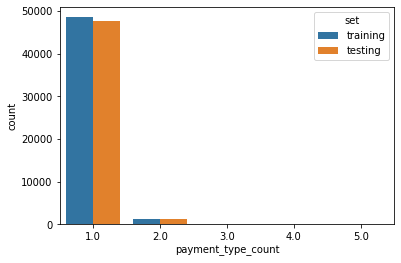

In [18]:
sns.countplot(x = df['payment_type_count'], hue = df['set'])

In [19]:
# df.loc[df['payment_type_count'].isnull(), ['payment_type_count', 'booking_status']] # only one row with status as 'completed'
df.loc[df['payment_type_count'].isnull(), 'payment_type_count'] = 1 # filling with 1 which is mode
df['payment_type_count'].isnull().sum()

0

**country**

In [20]:
df['country'].isnull().sum()

0

<AxesSubplot:xlabel='country', ylabel='count'>

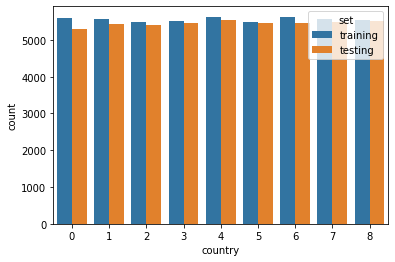

In [21]:
sns.countplot(x = df['country'], hue = df['set'])

**'payment_type_mode'**

In [22]:
# 'payment_type_mode' has no missing

<AxesSubplot:xlabel='payment_type_mode', ylabel='count'>

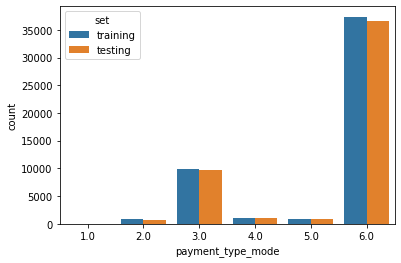

In [23]:
sns.countplot(x = df['payment_type_mode'], hue = df['set'])

<AxesSubplot:xlabel='payment_sequential_sum', ylabel='Count'>

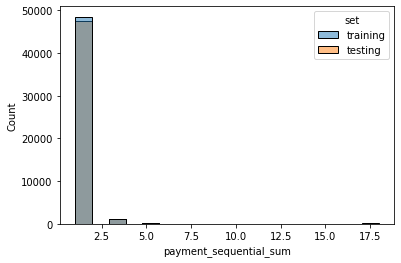

In [24]:
# 'payment_sequential_sum',
#        'payment_installments_count',

sns.histplot(x = df['payment_sequential_sum'], hue = df['set'])

<AxesSubplot:xlabel='payment_sequential_sum', ylabel='Count'>

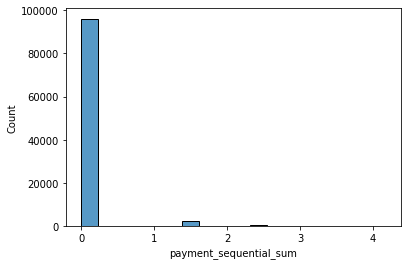

In [25]:
sns.histplot(x = np.log2(df['payment_sequential_sum']))

<AxesSubplot:xlabel='payment_installments_count', ylabel='Count'>

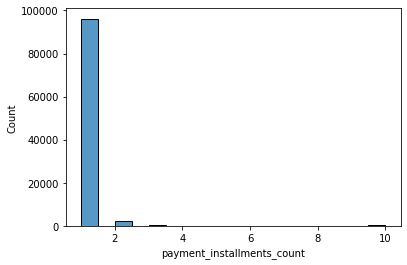

In [26]:
sns.histplot(x = df['payment_installments_count'])

In [27]:
df['payment_sequential_sum'].mode(), df['payment_installments_count'].mode()

(0    1.0
 dtype: float64,
 0    1.0
 dtype: float64)

In [28]:
df.loc[df['payment_sequential_sum'].isnull(), 'payment_sequential_sum'] = 1 # filling with 1 which is mode
df.loc[df['payment_installments_count'].isnull(), 'payment_installments_count'] = 1 # filling with 1 which is mode

# taking log2 looks quite reasonable
# itna bhi needed nahi tha

# df['payment_sequential_sum_log2'] = np.log2(df['payment_sequential_sum'])
# df['payment_installments_count_log2'] = np.log2(df['payment_installments_count'])

# df.drop(['payment_sequential_sum', 'payment_installments_count'], axis = 1, inplace = True)

<AxesSubplot:xlabel='payment_installments_sum', ylabel='Count'>

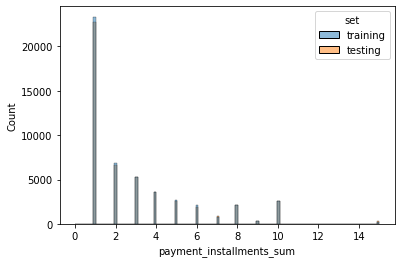

In [29]:
#  'payment_installments_sum'
sns.histplot(x = df['payment_installments_sum'], hue = df['set'])

In [30]:
# df['payment_installments_sum'].isnull().sum() # 1
df.loc[df['payment_installments_sum'].isnull(), 'payment_installments_sum'] = 1 # filling with 1 which is mode

In [31]:
# itna bhi outliers to lite hai
# kuch zero elements bhi hai, to log leke matlab nahi
# standard scalar (min max type?)

<AxesSubplot:xlabel='payment_value_count', ylabel='Count'>

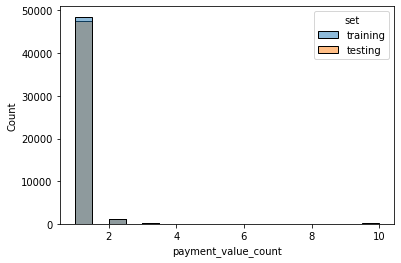

In [32]:
#        'payment_value_count', 'payment_value_sum', 
sns.histplot(x = df['payment_value_count'], hue = df['set']) # lite

In [33]:
df.loc[df['payment_value_count'].isnull(), 'payment_value_count'] = 1 # filling with 1 which is mode

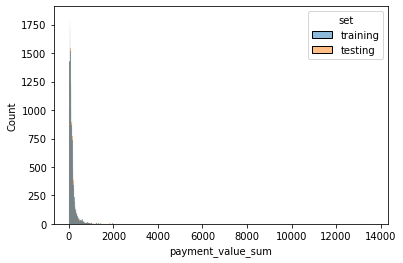

In [34]:
sns.histplot(x = df['payment_value_sum'], hue = df['set']) # ye aayi na baat outliers wali
# cap everything above 2000 as 2500

df.loc[df['payment_value_sum'].isnull(), 'payment_value_sum'] = 0 

<AxesSubplot:xlabel='payment_value_sum', ylabel='Count'>

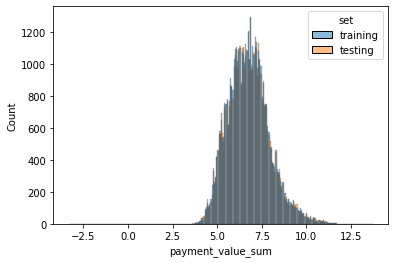

In [35]:
sns.histplot(x = np.log2(df['payment_value_sum'] + 0.1), hue = df['set']) # added chhotu sa value so that log2 0 does not go mad

In [36]:
df['payment_value_sum_log2'] = np.log2(df['payment_value_sum'] + 0.1)
df.drop('payment_value_sum', axis = 1, inplace = True)

<AxesSubplot:xlabel='booking_sequence_id_max', ylabel='Count'>

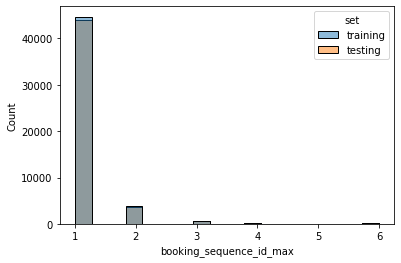

In [37]:
# 'booking_sequence_id_max'
sns.histplot(x = df['booking_sequence_id_max'], hue = df['set'])

In [38]:
# df.loc[df['booking_sequence_id_max'].isnull(), 'booking_sequence_id_max']
df.loc[df['booking_sequence_id_max'].isnull(), 'booking_sequence_id_max'] = 1 # filling with 1 which is mode

<AxesSubplot:xlabel='price_sum', ylabel='Count'>

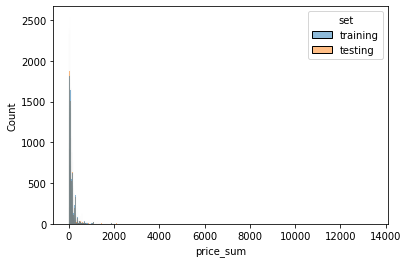

In [39]:
# 'price_sum'
sns.histplot(x = df['price_sum'], hue = df['set'])

<AxesSubplot:xlabel='price_sum', ylabel='Count'>

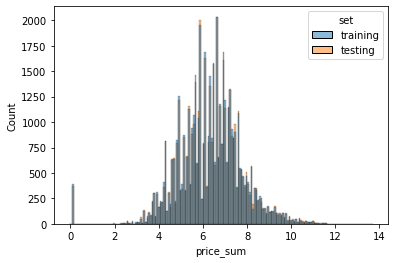

In [40]:
df.loc[df['price_sum'].isnull(), 'price_sum'] = 1 # filling with 1 which is mode
sns.histplot(x = np.log2(df['price_sum'] + 0.1), hue = df['set']) # added chhotu sa value so that log2 0 does not go mad

In [41]:
df['price_sum_log2'] = np.log2(df['price_sum']) + 0.1
df.drop('price_sum', axis = 1, inplace = True)

<AxesSubplot:xlabel='agent_fees_sum', ylabel='Count'>

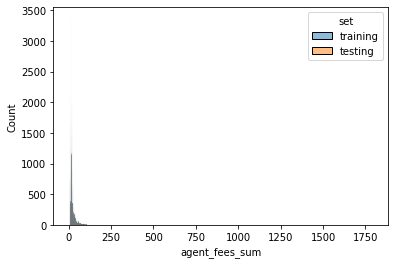

In [42]:
# 'agent_fees_sum'
sns.histplot(x = df['agent_fees_sum'], hue = df['set'])

<AxesSubplot:xlabel='agent_fees_sum', ylabel='Count'>

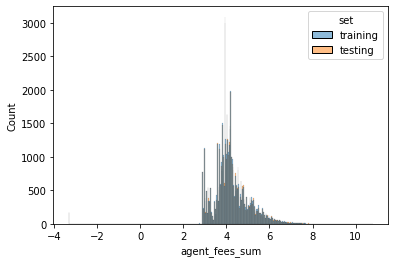

In [43]:
sns.histplot(x = np.log2(df['agent_fees_sum'] + 0.1), hue = df['set']) # added chhotu sa value so that log2 0 does not go mad

In [44]:
df.loc[df['agent_fees_sum'].isnull(), 'agent_fees_sum'] = 1 # filling with 1 which is mode
df['agent_fees_sum_log2'] = np.log2(df['agent_fees_sum'] + 0.1)
df.drop('agent_fees_sum', axis = 1, inplace = True)

<AxesSubplot:xlabel='hotel_category_max', ylabel='Count'>

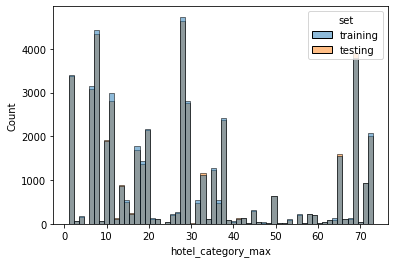

In [45]:
# 'hotel_category_max', 'hotel_category_count'
sns.histplot(x = df['hotel_category_max'], hue = df['set'])

In [46]:
df['hotel_category_max'].isnull().sum(), df['hotel_category_count'].isnull().sum()

(2143, 758)

In [47]:
df['hotel_category_max'].mean(), df['hotel_category_max'].mode() # okay fill with 28

(28.964708673764132,
 0    28.0
 dtype: float64)

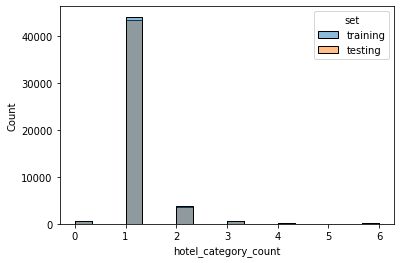

In [48]:
sns.histplot(x = df['hotel_category_count'], hue = df['set'])
df.loc[df['hotel_category_count'].isnull(), 'hotel_category_count'] = 1 # filling with 1 which is mode
df.loc[df['hotel_category_max'].isnull(), 'hotel_category_max'] = 28 # filling with 1 which is mode

<AxesSubplot:xlabel='hotel_name_length_mean', ylabel='Count'>

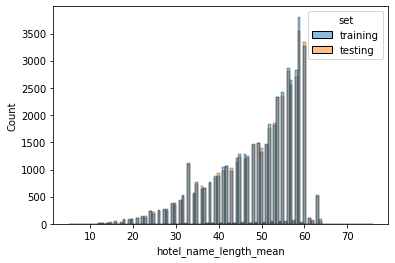

In [49]:
# 'hotel_name_length_mean', 'hotel_description_length_mean', 'hotel_photos_qty_mean',
sns.histplot(x = df['hotel_name_length_mean'], hue = df['set'])

In [50]:
df['hotel_name_length_mean'].mean(), df['hotel_name_length_mean'].mode() # okay fill with 55
df.loc[df['hotel_name_length_mean'].isnull(), 'hotel_name_length_mean'] = 55

<AxesSubplot:xlabel='hotel_description_length_mean', ylabel='Count'>

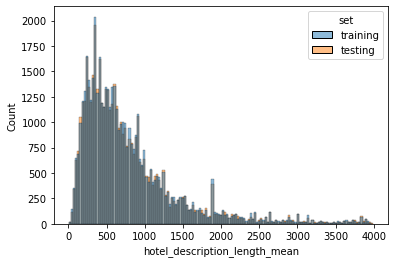

In [51]:
sns.histplot(x = df['hotel_description_length_mean'], hue = df['set'])

In [52]:
df['hotel_description_length_mean'].mean(), df['hotel_description_length_mean'].mode() # okay fill with 550
df.loc[df['hotel_description_length_mean'].isnull(), 'hotel_description_length_mean'] = 550

<AxesSubplot:xlabel='hotel_description_length_mean', ylabel='Count'>

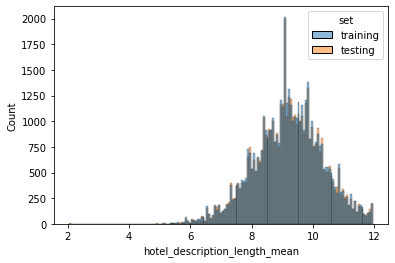

In [53]:
sns.histplot(x = np.log2(df['hotel_description_length_mean'] + 0.1), hue = df['set']) # added chhotu sa value so that log2 0 does not go mad

In [54]:
df['hotel_description_length_mean_log2'] = np.log2(df['hotel_description_length_mean']) + 0.1
df.drop('hotel_description_length_mean', axis = 1, inplace = True)

<AxesSubplot:xlabel='hotel_photos_qty_mean', ylabel='Count'>

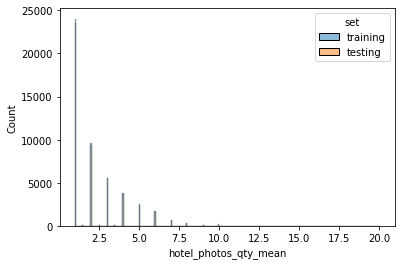

In [55]:
sns.histplot(x = df['hotel_photos_qty_mean'], hue = df['set'])

In [56]:
df['hotel_photos_qty_mean'].mean(), df['hotel_photos_qty_mean'].mode() # okay fill with 1
df.loc[df['hotel_photos_qty_mean'].isnull(), 'hotel_photos_qty_mean'] = 1

<AxesSubplot:xlabel='seller_agent_id_count', ylabel='Count'>

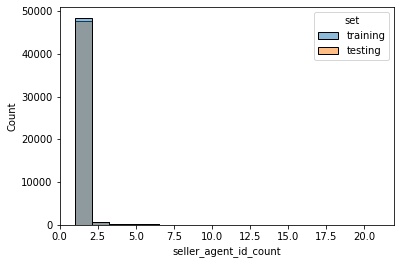

In [57]:
# 'seller_agent_id_count'
sns.histplot(x = df['seller_agent_id_count'], hue = df['set'])

In [58]:
df.loc[df['seller_agent_id_count'].isnull(), 'seller_agent_id_count'] = 1

In [59]:
# 'booking_create_timestamp_year',
#        'booking_create_timestamp_month', 'booking_create_timestamp_week',
#        'booking_create_timestamp_weekday', 'booking_create_timestamp_hour',

# no missing value here

In [60]:
#        'booking_approved_at_year', 'booking_approved_at_month',
#        'booking_approved_at_week', 'booking_approved_at_weekday',
#        'booking_approved_at_hour',
# df['booking_approved_at_year'].isnull().sum() # same 155 cases having nulls for all these columns

In [61]:
df['booking_approved_at_year'].mode().values[0]

2008.0

In [62]:
df.loc[df['booking_approved_at_year'].isnull(), 'booking_approved_at_year'] = df['booking_approved_at_year'].mode().values[0]
df.loc[df['booking_approved_at_month'].isnull(), 'booking_approved_at_month'] = df['booking_approved_at_month'].mode().values[0]
df.loc[df['booking_approved_at_week'].isnull(), 'booking_approved_at_week'] = df['booking_approved_at_week'].mode().values[0]
df.loc[df['booking_approved_at_weekday'].isnull(), 'booking_approved_at_weekday'] = df['booking_approved_at_weekday'].mode().values[0]
df.loc[df['booking_approved_at_hour'].isnull(), 'booking_approved_at_hour'] = df['booking_approved_at_hour'].mode().values[0]

In [63]:
# 'booking_checkin_customer_date_year',
#        'booking_checkin_customer_date_month',
#        'booking_checkin_customer_date_week',
#        'booking_checkin_customer_date_weekday',
#        'booking_checkin_customer_date_hour',

print(df.loc[(df['set'] == 'training') & (df['booking_checkin_customer_date_year'].isnull())].shape[0])
print(df.loc[(df['set'] == 'testing') & (df['booking_checkin_customer_date_year'].isnull())].shape[0])

1457
1401


In [64]:
df.loc[df['booking_checkin_customer_date_year'].isnull(), 'booking_checkin_customer_date_year'] = df['booking_checkin_customer_date_year'].mode().values[0]
df.loc[df['booking_checkin_customer_date_month'].isnull(), 'booking_checkin_customer_date_month'] = df['booking_checkin_customer_date_month'].mode().values[0]
df.loc[df['booking_checkin_customer_date_week'].isnull(), 'booking_checkin_customer_date_week'] = df['booking_checkin_customer_date_week'].mode().values[0]
df.loc[df['booking_checkin_customer_date_weekday'].isnull(), 'booking_checkin_customer_date_weekday'] = df['booking_checkin_customer_date_weekday'].mode().values[0]
df.loc[df['booking_checkin_customer_date_hour'].isnull(), 'booking_checkin_customer_date_hour'] = df['booking_checkin_customer_date_hour'].mode().values[0]

In [65]:
#        'booking_approved_minus_created_days',
#        'booking_approved_minus_created_hours',
#        'booking_checkin_minus_created_days'
    
    
# approved minus created 
df['booking_approved_minus_created_days'] = (df['booking_approved_at'] - df['booking_create_timestamp']).dt.days # decently spread
df['booking_approved_minus_created_hours'] = (df['booking_approved_at'] - df['booking_create_timestamp']).dt.total_seconds() / 3600 # difference in hours

# checkin minus created
df['booking_checkin_minus_created_days'] = (df['booking_checkin_customer_date'] - df['booking_create_timestamp']).dt.days
df['booking_checkin_minus_created_hours'] = (df['booking_checkin_customer_date'] - df['booking_create_timestamp']).dt.total_seconds() / 36000 # difference in 10*hours

<AxesSubplot:xlabel='booking_approved_minus_created_days', ylabel='Count'>

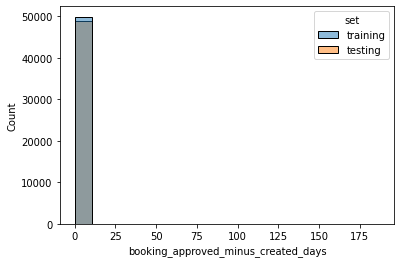

In [66]:
# booking_approved_minus_created_days
sns.histplot(x = df['booking_approved_minus_created_days'], hue = df['set'])

In [67]:
df.loc[df['booking_approved_minus_created_days'].isnull(), 'booking_approved_minus_created_days'] = df['booking_approved_minus_created_days'].mode().values[0]

In [68]:
# sns.histplot(x = df['booking_approved_minus_created_hours'], hue = df['set'])

<AxesSubplot:xlabel='booking_approved_minus_created_hours', ylabel='Count'>

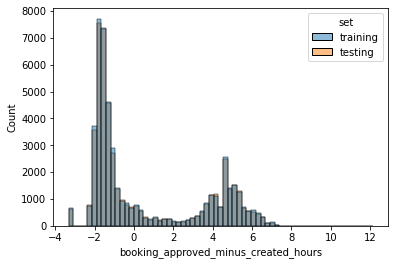

In [69]:
sns.histplot(x = np.log2(df['booking_approved_minus_created_hours'] + 0.1), hue = df['set'])

In [70]:
df.loc[df['booking_approved_minus_created_hours'].isnull(), 'booking_approved_minus_created_hours'] = df['booking_approved_minus_created_hours'].mode().values[0]
df['booking_approved_minus_created_hours_log2'] = np.log2(df['booking_approved_minus_created_hours'] + 0.1)
df.drop('booking_approved_minus_created_hours', axis = 1, inplace = True)

<AxesSubplot:xlabel='booking_checkin_minus_created_days', ylabel='Count'>

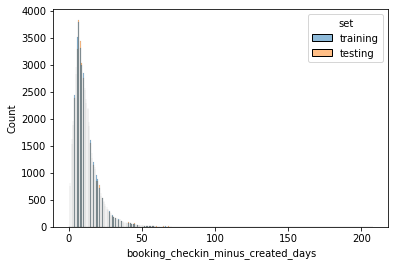

In [71]:
# booking_checkin_minus_created_days
sns.histplot(x = df['booking_checkin_minus_created_days'] , hue = df['set']) # outlierrs

In [72]:
df['booking_checkin_minus_created_days'].mode().values[0], df['booking_checkin_minus_created_days'].mean()

(7.0, 12.057399112459859)

In [73]:
df.loc[df['booking_checkin_minus_created_days'].isnull(), 'booking_checkin_minus_created_days'] = df['booking_checkin_minus_created_days'].mode().values[0]

<AxesSubplot:xlabel='booking_checkin_minus_created_days', ylabel='Count'>

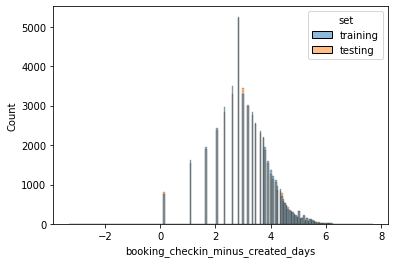

In [74]:
sns.histplot(x = np.log2(df['booking_checkin_minus_created_days'] + 0.1), hue = df['set'])

In [75]:
df['booking_checkin_minus_created_days_log2'] = np.log2(df['booking_checkin_minus_created_days'] + 0.1)
df.drop('booking_checkin_minus_created_days', axis = 1, inplace = True)

4.96575 30.052368957053726


<AxesSubplot:xlabel='booking_checkin_minus_created_hours', ylabel='Count'>

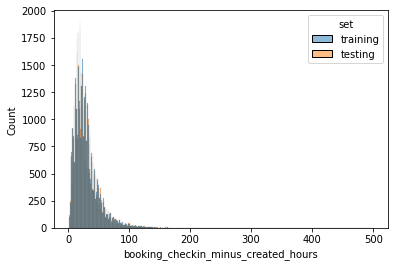

In [76]:
# booking_checkin_minus_created_hours
print(df['booking_checkin_minus_created_hours'].mode().values[0], df['booking_checkin_minus_created_hours'].mean())
sns.histplot(x = df['booking_checkin_minus_created_hours'] , hue = df['set']) # outlierrs

<AxesSubplot:xlabel='booking_checkin_minus_created_hours', ylabel='Count'>

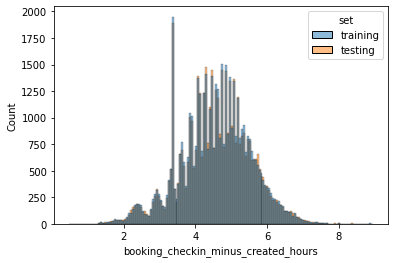

In [77]:
df.loc[df['booking_checkin_minus_created_hours'].isnull(), 'booking_checkin_minus_created_hours'] = 10 # seems like best value
sns.histplot(x = np.log2(df['booking_checkin_minus_created_hours'] + 0.1), hue = df['set'])

In [78]:
df['booking_checkin_minus_created_hours_log2'] = np.log2(df['booking_checkin_minus_created_hours']) + 0.1
df.drop('booking_checkin_minus_created_hours', axis = 1, inplace = True)

In [79]:
# finally drop datetype wale columns
df = df.drop(['booking_create_timestamp', 'booking_approved_at', 'booking_checkin_customer_date',
              'booking_create_timestamp', 'booking_approved_at', 'booking_checkin_customer_date',
             'booking_expiry_date_min', 'booking_expiry_date_max', 'booking_expiry_date_count'], axis=1)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99079 entries, 0 to 99078
Data columns (total 40 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   booking_id                                 99079 non-null  object 
 1   rating_score                               99079 non-null  int64  
 2   set                                        99079 non-null  object 
 3   booking_status                             99079 non-null  int64  
 4   country                                    99079 non-null  int64  
 5   payment_type_mode                          99079 non-null  float64
 6   payment_type_count                         99079 non-null  float64
 7   payment_sequential_sum                     99079 non-null  float64
 8   payment_installments_count                 99079 non-null  float64
 9   payment_installments_sum                   99079 non-null  float64
 10  payment_value_count   

In [81]:
df.to_csv('full_data_to_use_non_binned.csv',index=False)

**outliers hatana padega kya**

In [82]:
import seaborn as sns

<AxesSubplot:ylabel='count'>

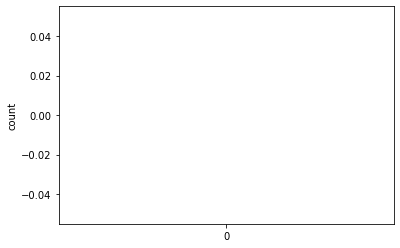

In [83]:
sns.countplot()

In [84]:
# df.loc[df['set'] == 'training', 'booking_approved_minus_created_days'].plot.hist()

In [85]:
# df.loc[df['set'] == 'testing', 'booking_approved_minus_created_days'].plot.hist()

In [86]:
# (df['booking_approved_at'] - df['booking_create_timestamp']).dt.days.plot.hist()

In [87]:
# # checkin minus created
# (df['booking_checkin_customer_date'] - df['booking_create_timestamp']).dt.days.plot.hist()

**expiry date ke min aur max to lite hi lagte hai**

In [88]:
# fig, axs = plt.subplots(2, 3, figsize = (20,10))

# df.groupby(df["booking_expiry_date_min"].dt.year)['booking_id'].count().plot(kind="bar", ax = axs[0,0])
# df.groupby(df["booking_expiry_date_min"].dt.month)['booking_id'].count().plot(kind="bar", ax = axs[0,1])
# df.groupby(df["booking_expiry_date_min"].dt.day)['booking_id'].count().plot(kind="bar", ax = axs[0,2])
# df.groupby(df["booking_expiry_date_min"].dt.isocalendar().week)['booking_id'].count().plot(kind="bar", ax = axs[1,0])
# df.groupby(df["booking_expiry_date_min"].dt.hour)['booking_id'].count().plot(kind="bar", ax = axs[1,1])
# df.groupby(df["booking_expiry_date_min"].dt.weekday)['booking_id'].count().plot(kind="bar", ax = axs[1,2])
# fig.suptitle('booking_expiry_date_min')

# plt.show()

In [89]:
# fig, axs = plt.subplots(2, 3, figsize = (20,10))

# df.groupby(df["booking_expiry_date_max"].dt.year)['booking_id'].count().plot(kind="bar", ax = axs[0,0])
# df.groupby(df["booking_expiry_date_max"].dt.month)['booking_id'].count().plot(kind="bar", ax = axs[0,1])
# df.groupby(df["booking_expiry_date_max"].dt.day)['booking_id'].count().plot(kind="bar", ax = axs[0,2])
# df.groupby(df["booking_expiry_date_max"].dt.isocalendar().week)['booking_id'].count().plot(kind="bar", ax = axs[1,0])
# df.groupby(df["booking_expiry_date_max"].dt.hour)['booking_id'].count().plot(kind="bar", ax = axs[1,1])
# df.groupby(df["booking_expiry_date_max"].dt.weekday)['booking_id'].count().plot(kind="bar", ax = axs[1,2])
# fig.suptitle('booking_expiry_date_max')

# plt.show()